Columns: &nbsp; \
Date - Date of measurement, format DD.MM.YYYY &nbsp; \
Time - Time of measurement, time reference UTC+0, time step 60 min, time format HH:MM, center of the averaging interval &nbsp; \
GHI - Global horizontal irradiation [Wh/m2], no data value -9 &nbsp; \
DNI - Direct normal irradiation [Wh/m2], no data value -9 &nbsp; \
DIF - Diffuse horizontal irradiation [Wh/m2], no data value -9 &nbsp; \
GTI - Global tilted irradiation [Wh/m2] (fixed inclination: 6 deg. azimuth: 180 deg., rel. row spacing: 2.6), no data value -9 &nbsp; \
flagR - Cloud identification quality flag: 0: sun below horizon, 1: model value, 2: interpolated <=1hour, 3: extrapolated <=1hour, 4: interpolated/extrapolated >1hour,  5: long term monthly median or persistence,  6: synthetic data, 11:NWP forecast &nbsp; \
SE - Sun altitude (elevation) angle [deg.] &nbsp; \
SA - Sun azimuth angle [deg.] &nbsp; \
TEMP - Air temperature at 2 m [deg. C] &nbsp; \
WS - Wind speed at 10 m [m/s] &nbsp; \
WD - Wind direction at 10 m [deg.] &nbsp; \
RH - Relative humidity [%] &nbsp; \
AP - Atmospheric pressure [hPa] &nbsp; \
PWAT - Precipitable water [kg/m2], no data value -99 &nbsp; \


In [323]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [324]:
# The compulsory 10 head values to check on when creating a new data frame.
Rad_df = pd.read_csv('Solar-Measurements_Maldives_Male_WB-ESMAP_SatelliteTS.csv', encoding = "ISO-8859-1", delimiter=';')
Rad_df.head(10)

,Date,Time,GHI,DNI,DIF,GTI,flagR,SE,SA,TEMP,WS,WD,RH,AP,PWAT
0,01.01.1999,00:30,0,0,0,0,0,-10.62,-67.24,26.8,3.9,49,76.1,1009.6,56.9
1,01.01.1999,01:30,8,0,8,8,2,3.49,-66.52,26.7,3.9,45,77.9,1010.4,58.0
2,01.01.1999,02:30,25,0,25,25,1,16.77,-64.30,26.6,3.6,33,78.8,1011.4,59.0
3,01.01.1999,03:30,40,0,40,39,1,29.99,-60.12,26.4,3.6,21,79.9,1012.0,60.4
4,01.01.1999,04:30,53,0,53,53,1,42.48,-52.81,26.2,3.8,10,81.1,1012.1,61.8
5,01.01.1999,05:30,73,0,73,72,1,53.36,-40.00,25.9,4.1,92,82.4,1012.2,62.6
6,01.01.1999,06:30,295,26,271,298,1,60.74,-18.45,25.7,4.2,182,83.7,1012.0,62.7
7,01.01.1999,07:30,95,3,93,95,1,61.87,9.96,25.5,4.1,11,84.2,1011.6,62.4
8,01.01.1999,08:30,123,0,123,123,1,56.15,34.36,25.4,3.8,10,83.9,1011.0,61.7
9,01.01.1999,09:30,378,227,225,392,1,46.09,49.58,25.3,3.6,93,83.2,1010.6,61.5


In [325]:
Rad_df.columns

Index(['Date', 'Time', 'GHI', 'DNI', 'DIF', 'GTI', 'flagR', 'SE', 'SA', 'TEMP',
       'WS', 'WD', 'RH', 'AP', 'PWAT'],
      dtype='object')

In [326]:
Rad_df = Rad_df.replace(-9, np.nan)

In [327]:
Rad_df.dtypes

Date      object
Time      object
GHI        int64
DNI        int64
DIF        int64
GTI        int64
flagR      int64
SE       float64
SA       float64
TEMP     float64
WS       float64
WD         int64
RH       float64
AP       float64
PWAT     float64
dtype: object

In [328]:
Rad_df['Date'] = pd.to_datetime(Rad_df['Date'])
Rad_df['Year'] = Rad_df['Date'].dt.year
Rad_df['Month'] = Rad_df['Date'].dt.month
Rad_df['Day'] = Rad_df['Date'].dt.day
Rad_df.head(5)

,Date,Time,GHI,DNI,DIF,GTI,flagR,SE,SA,TEMP,WS,WD,RH,AP,PWAT,Year,Month,Day
0,1999-01-01,00:30,0,0,0,0,0,-10.62,-67.24,26.8,3.9,49,76.1,1009.6,56.9,1999,1,1
1,1999-01-01,01:30,8,0,8,8,2,3.49,-66.52,26.7,3.9,45,77.9,1010.4,58.0,1999,1,1
2,1999-01-01,02:30,25,0,25,25,1,16.77,-64.30,26.6,3.6,33,78.8,1011.4,59.0,1999,1,1
3,1999-01-01,03:30,40,0,40,39,1,29.99,-60.12,26.4,3.6,21,79.9,1012.0,60.4,1999,1,1
4,1999-01-01,04:30,53,0,53,53,1,42.48,-52.81,26.2,3.8,10,81.1,1012.1,61.8,1999,1,1


In [329]:
group_by_year = Rad_df.groupby('Year').sum()
group_by_Month = Rad_df.groupby('Month').sum()
group_by_day = Rad_df.groupby('Day').sum()
group_by_time = Rad_df.groupby('Time').sum()
group_by_ghi = Rad_df.groupby('GHI').sum()
group_by_year

,GHI,DNI,DIF,GTI,flagR,SE,SA,TEMP,WS,WD,RH,AP,PWAT,Month,Day
Year,,,,,,,,,,,,,,,
1999,2045447,1526252,915652,2054898,4819,784.91,-1431.75,243392.0,47961.1,1939365,642573.6,8847973.9,410829.7,57168,137712
2000,2042742,1479994,943383,2056491,4830,727.09,-1440.73,244289.2,47537.6,1962919,646779.5,8869910.3,408403.7,57216,138408
2001,2061656,1438348,979656,2072865,4817,784.86,-1546.38,244642.0,47727.0,1859435,651271.5,8848848.0,418230.4,57168,137712
2002,2001163,1363779,978286,2007745,4816,784.65,-1566.26,246086.5,46789.9,1814134,647303.8,8851725.0,427992.7,57168,137712
2003,2046326,1524635,917412,2060303,4817,784.84,-1429.36,246798.0,43855.5,1784579,647557.9,8850301.4,423263.0,57168,137712
2004,2065365,1504381,941928,2075611,4829,726.96,-1438.12,245925.0,47778.3,1740230,651331.9,8875022.7,421211.2,57216,138408
2005,2098247,1552964,944286,2110978,4833,784.94,-1544.27,246570.5,47906.5,1886771,648011.7,8850778.2,416342.3,57168,137712
2006,1972225,1374722,942973,1977726,4816,784.64,-1563.57,245668.0,44044.6,1704230,651177.3,8850078.3,427054.3,57168,137712
2007,2070658,1517305,942465,2082144,4817,784.98,-1427.08,246009.1,44052.9,1740241,645766.0,8845517.3,413469.9,57168,137712


In [365]:
# apparently the data is not missing The GHI affects DNI, DIF, GTI and flagR that's crazy. 
group_by_time.head(100)

,GHI,DNI,DIF,GTI,flagR,SE,SA,TEMP,WS,WD,RH,AP,PWAT,Year,Month,Day
Time,,,,,,,,,,,,,,,,
00:30,3805,4035,3527,3833,74,-58639.74,-641608.90,196362.2,35040.5,1468138,522510.3,7.127518e+06,335961.8,14177680,45760,110838
01:30,383334,417499,307897,380727,8784,42593.08,-634243.64,196395.2,35652.7,1469436,522269.3,7.129979e+06,335546.2,14177680,45760,110838
02:30,1459408,1496351,917366,1463228,7061,141971.14,-626642.01,196664.5,35268.2,1470846,521040.6,7.133421e+06,335205.1,14177680,45760,110838
03:30,2847412,2420171,1472774,2860024,7060,241862.50,-617839.35,197104.9,35013.9,1467249,519764.2,7.136966e+06,335159.6,14177680,45760,110838
04:30,4129945,3078016,1846739,4154271,7060,339446.80,-606372.09,197542.7,34880.5,1461077,518836.8,7.138849e+06,335368.3,14177680,45760,110838
05:30,5033316,3348392,2125277,5066888,7063,431014.98,-590052.06,197920.6,34894.6,1458149,518293.0,7.138949e+06,335578.5,14177680,45760,110838
06:30,5523224,3488478,2245927,5561435,7063,504000.64,-570062.28,198131.8,35044.6,1458426,518307.1,7.136774e+06,335987.4,14177680,45760,110838
07:30,5645410,3632287,2201722,5682470,7065,513560.52,575188.42,198192.4,35450.4,1465110,518428.2,7.132904e+06,336345.6,14177680,45760,110838
08:30,5201686,3453553,2116754,5233006,7065,448126.80,590169.90,198293.8,35984.6,1470111,518056.6,7.127979e+06,336498.6,14177680,45760,110838


<AxesSubplot:ylabel='Time'>

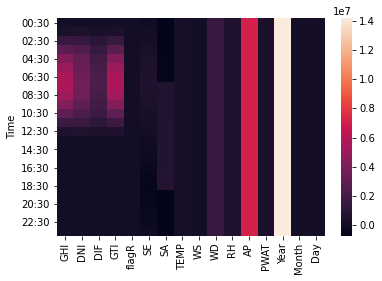

In [331]:
sns.heatmap(data = group_by_time)

<AxesSubplot:ylabel='Year'>

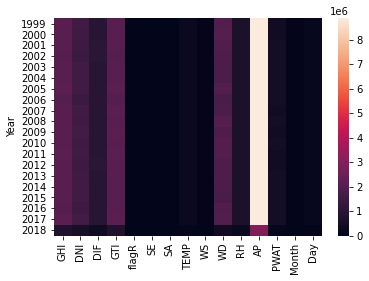

In [332]:
sns.heatmap(data = group_by_year)

<AxesSubplot:ylabel='Month'>

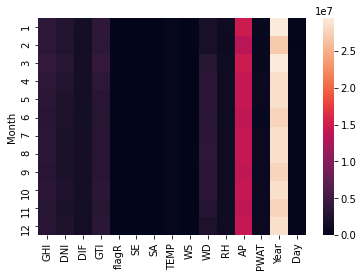

In [333]:
sns.heatmap(data = group_by_Month)

<AxesSubplot:ylabel='Day'>

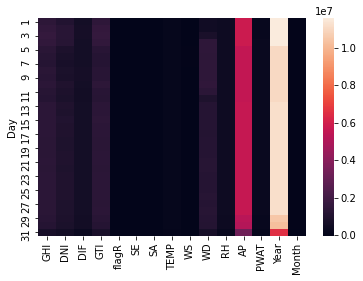

In [334]:
sns.heatmap(data = group_by_day)

<AxesSubplot:xlabel='count', ylabel='flagR'>

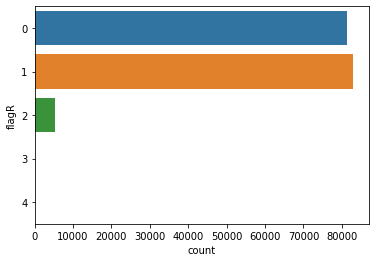

In [335]:
sns.countplot(data = Rad_df, y = 'flagR')

In [336]:
list_of_null  = Rad_df.isnull().sum()

data_loss = []
for i in range(len(list_of_null)):
    if list_of_null[i] > 0:
        print( Rad_df.columns[i] + ' ' + str(round((list_of_null[i] / len(Rad_df.index)) * 100,2)) + '%')
        data_loss.append(round((list_of_null[i] / len(Rad_df.index)) * 100,2))
        
list_of_null

Date     0
Time     0
GHI      0
DNI      0
DIF      0
GTI      0
flagR    0
SE       0
SA       0
TEMP     0
WS       0
WD       0
RH       0
AP       0
PWAT     0
Year     0
Month    0
Day      0
dtype: int64

In [337]:
Rad_df.describe()

,GHI,DNI,DIF,GTI,flagR,SE,SA,TEMP,WS,WD,RH,AP,PWAT,Year,Month,Day
count,169440.000000,169440.000000,169440.000000,169440.000000,169440.000000,169440.000000,169440.000000,169440.000000,169440.000000,169440.000000,169440.000000,169440.000000,169440.000000,169440.000000,169440.000000,169440.000000
mean,234.412860,169.790356,107.894801,235.674068,0.551735,0.074849,-0.176960,28.021857,5.028702,208.010635,73.607202,1010.069572,47.759788,2008.169972,6.481586,15.699433
std,320.437299,250.907581,134.433488,322.949960,0.556503,47.236493,96.775421,0.663300,2.052169,99.096594,3.070924,1.534834,8.624935,5.582339,3.456756,8.829110
min,0.000000,0.000000,0.000000,0.000000,0.000000,-85.580000,-170.650000,24.600000,0.100000,0.000000,51.500000,1003.000000,11.600000,1999.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,-42.460000,-90.970000,27.600000,3.600000,94.000000,71.800000,1009.000000,41.900000,2003.000000,3.000000,8.000000
50%,12.000000,0.000000,10.000000,11.000000,1.000000,-0.285000,-1.615000,28.000000,5.000000,252.000000,73.800000,1010.000000,49.000000,2008.000000,6.000000,16.000000
75%,463.000000,324.000000,220.000000,465.000000,1.000000,41.370000,90.740000,28.500000,6.400000,277.000000,75.600000,1011.000000,54.500000,2013.000000,9.000000,23.000000
max,1082.000000,924.000000,544.000000,1090.000000,4.000000,84.760000,167.070000,30.400000,14.500000,360.000000,87.600000,1017.000000,70.900000,2018.000000,12.000000,31.000000


In [338]:
Rad_df.describe(include=[object, np.datetime64])

<ipython-input-338-011b719dd7e9>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Rad_df.describe(include=[object, np.datetime64])


,Date,Time
count,169440,169440
unique,7060,24
top,2001-12-20 00:00:00,17:30
freq,24,7060
first,1999-01-01 00:00:00,NaN
last,2018-12-04 00:00:00,NaN


In [339]:
Rad_df.dtypes

Date     datetime64[ns]
Time             object
GHI               int64
DNI               int64
DIF               int64
GTI               int64
flagR             int64
SE              float64
SA              float64
TEMP            float64
WS              float64
WD                int64
RH              float64
AP              float64
PWAT            float64
Year              int64
Month             int64
Day               int64
dtype: object

Now it's time for a breakdown...

In [340]:
by_year_df = Rad_df.groupby('Year')
by_Month_df = Rad_df.groupby('Month')
by_day_df = Rad_df.groupby('Day')
by_time_df = Rad_df.groupby('Time')

In [341]:
year_stats = by_year_df.describe()

In [342]:
year_obj_stats = by_year_df.describe(include=[object, np.datetime64])

/usr/local/lib/python3.9/site-packages/pandas/core/groupby/groupby.py:1750: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  result = self.apply(lambda x: x.describe(**kwargs))
/usr/local/lib/python3.9/site-packages/pandas/core/groupby/groupby.py:1750: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  result = self.apply(lambda x: x.describe(**kwargs))
/usr/local/lib/python3.9/site-packages/pandas/core/groupby/groupby.py:1750: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime

In [343]:
month_stats = by_Month_df.describe()

In [344]:
month_obj_stats = by_Month_df.describe(include=[object, np.datetime64])

/usr/local/lib/python3.9/site-packages/pandas/core/groupby/groupby.py:1750: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  result = self.apply(lambda x: x.describe(**kwargs))
/usr/local/lib/python3.9/site-packages/pandas/core/groupby/groupby.py:1750: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  result = self.apply(lambda x: x.describe(**kwargs))
/usr/local/lib/python3.9/site-packages/pandas/core/groupby/groupby.py:1750: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime

In [345]:
day_stats = by_day_df.describe()

In [346]:
day_obj_stats =  by_day_df.describe(include=[object, np.datetime64])

/usr/local/lib/python3.9/site-packages/pandas/core/groupby/groupby.py:1750: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  result = self.apply(lambda x: x.describe(**kwargs))
/usr/local/lib/python3.9/site-packages/pandas/core/groupby/groupby.py:1750: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  result = self.apply(lambda x: x.describe(**kwargs))
/usr/local/lib/python3.9/site-packages/pandas/core/groupby/groupby.py:1750: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime

/usr/local/lib/python3.9/site-packages/pandas/core/groupby/groupby.py:1750: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  result = self.apply(lambda x: x.describe(**kwargs))
/usr/local/lib/python3.9/site-packages/pandas/core/groupby/groupby.py:1750: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  result = self.apply(lambda x: x.describe(**kwargs))
/usr/local/lib/python3.9/site-packages/pandas/core/groupby/groupby.py:1750: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime

In [347]:
time_stats = by_time_df.describe()

In [348]:
time_obj_stats = by_time_df.describe(include=[object, np.datetime64])

/usr/local/lib/python3.9/site-packages/pandas/core/groupby/groupby.py:1750: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  result = self.apply(lambda x: x.describe(**kwargs))
/usr/local/lib/python3.9/site-packages/pandas/core/groupby/groupby.py:1750: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  result = self.apply(lambda x: x.describe(**kwargs))
/usr/local/lib/python3.9/site-packages/pandas/core/groupby/groupby.py:1750: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime

/usr/local/lib/python3.9/site-packages/pandas/core/groupby/groupby.py:1750: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  result = self.apply(lambda x: x.describe(**kwargs))


In [367]:
year_stats['GHI']

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
1999,8760.0,233.498516,320.075346,0.0,0.0,12.0,462.00,1042.0
2000,8784.0,232.552596,318.824535,0.0,0.0,11.5,462.25,1062.0
2001,8760.0,235.348858,319.451031,0.0,0.0,12.0,465.00,1043.0
2002,8760.0,228.443265,312.657303,0.0,0.0,11.0,454.00,1037.0
2003,8760.0,233.598858,319.889695,0.0,0.0,12.5,458.25,1055.0
2004,8784.0,235.128074,320.727901,0.0,0.0,11.0,463.00,1060.0
2005,8760.0,239.525913,323.701707,0.0,0.0,12.5,482.00,1061.0
2006,8760.0,225.139840,313.325475,0.0,0.0,13.0,422.00,1045.0
2007,8760.0,236.376484,322.536041,0.0,0.0,12.5,470.25,1071.0


<AxesSubplot:ylabel='Year'>

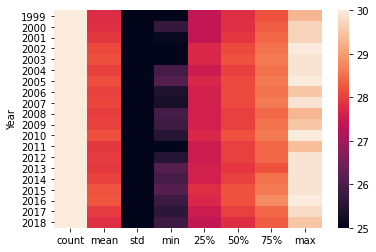

In [350]:
sns.heatmap(data = year_stats['TEMP'], vmax = 30, vmin = 25)

<AxesSubplot:ylabel='Year'>

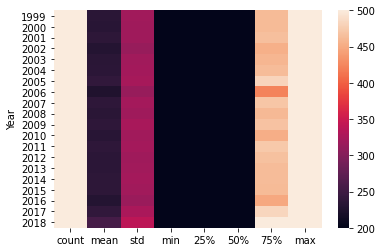

In [370]:
sns.heatmap(data = year_stats['GHI'], vmax = 200, vmin = 500)

<AxesSubplot:ylabel='Month'>

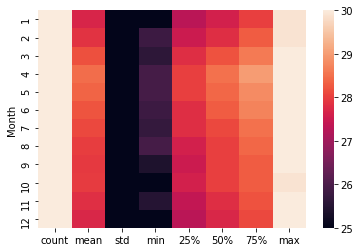

In [351]:
sns.heatmap(data = month_stats['TEMP'], vmax = 30, vmin = 25)

<AxesSubplot:ylabel='Day'>

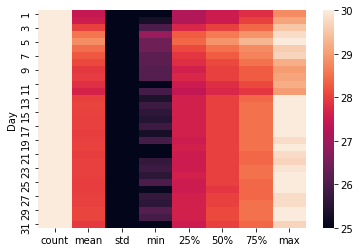

In [352]:
sns.heatmap(data = day_stats['TEMP'], vmax = 30, vmin = 25)

<AxesSubplot:ylabel='Time'>

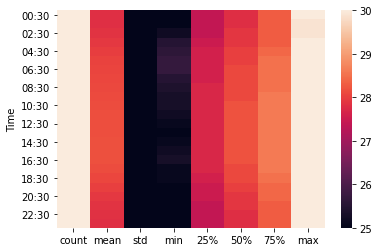

In [353]:
sns.heatmap(data = time_stats['TEMP'], vmax = 30, vmin = 25)

<AxesSubplot:xlabel='Year', ylabel='TEMP'>

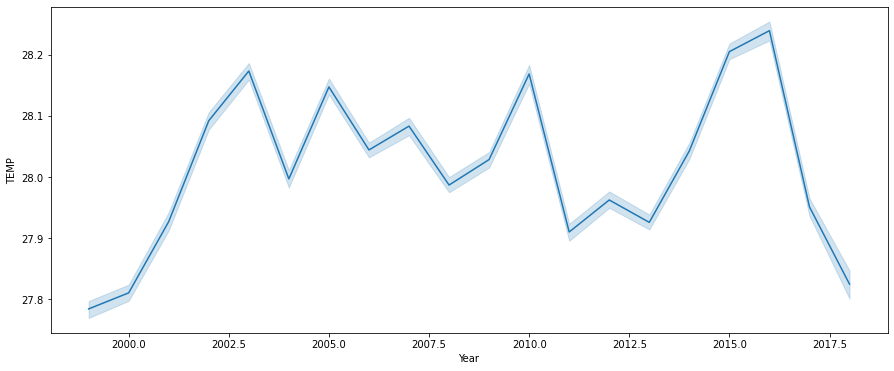

In [354]:
fig = plt.figure(figsize=(15,6))
sns.lineplot(data = Rad_df, x = 'Year', y = 'TEMP')

<AxesSubplot:xlabel='Month', ylabel='TEMP'>

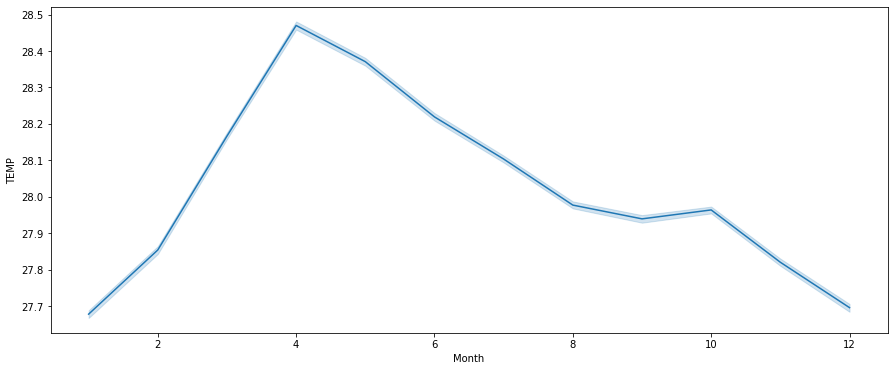

In [355]:
fig = plt.figure(figsize=(15,6))
sns.lineplot(data = Rad_df, x = 'Month', y = 'TEMP')

<AxesSubplot:xlabel='Day', ylabel='TEMP'>

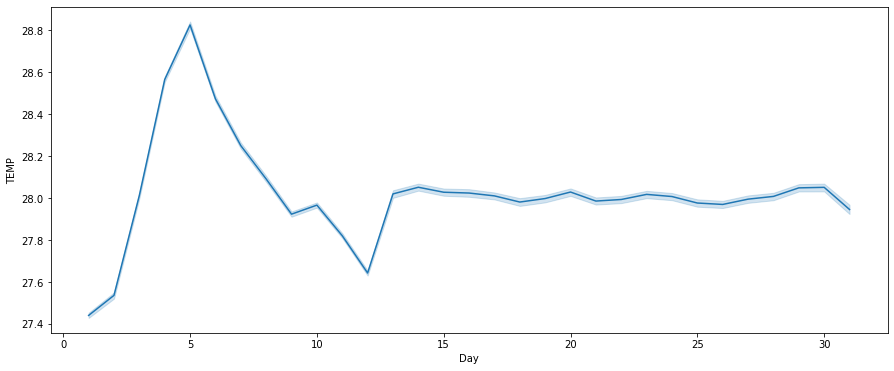

In [356]:
fig = plt.figure(figsize=(15,6))
sns.lineplot(data = Rad_df, x = 'Day', y = 'TEMP')

<AxesSubplot:xlabel='Time', ylabel='TEMP'>

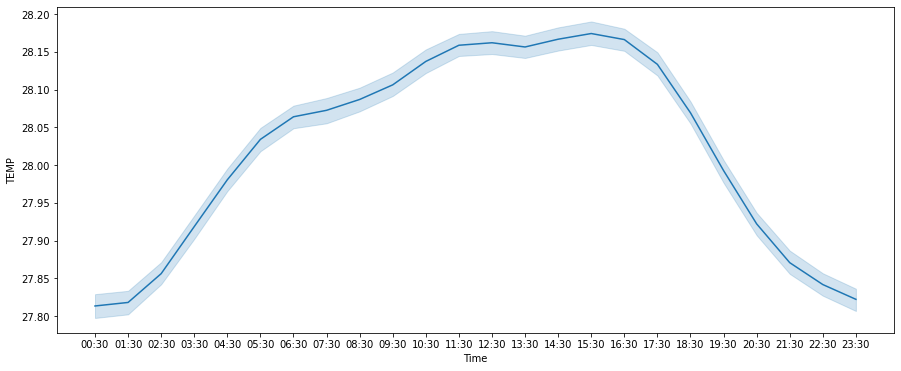

In [357]:
fig = plt.figure(figsize=(15,6))
sns.lineplot(data = Rad_df, x = 'Time', y = 'TEMP')

<AxesSubplot:xlabel='TEMP', ylabel='GHI'>

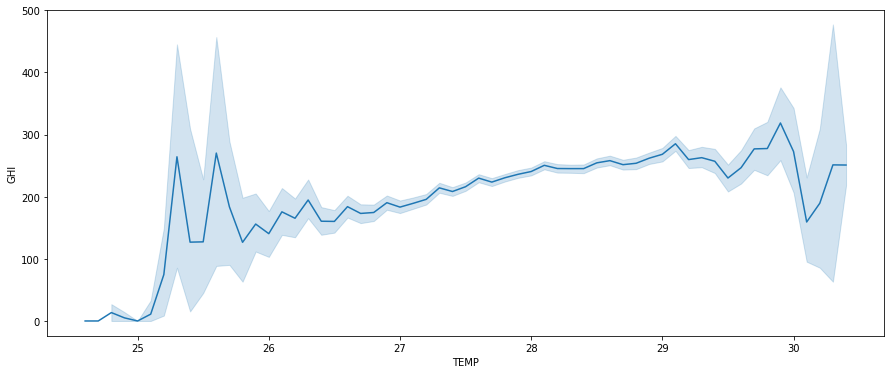

In [358]:
fig = plt.figure(figsize=(15,6)) 
sns.lineplot(data = Rad_df, x = 'TEMP', y = 'GHI')

<AxesSubplot:xlabel='TEMP', ylabel='GHI'>

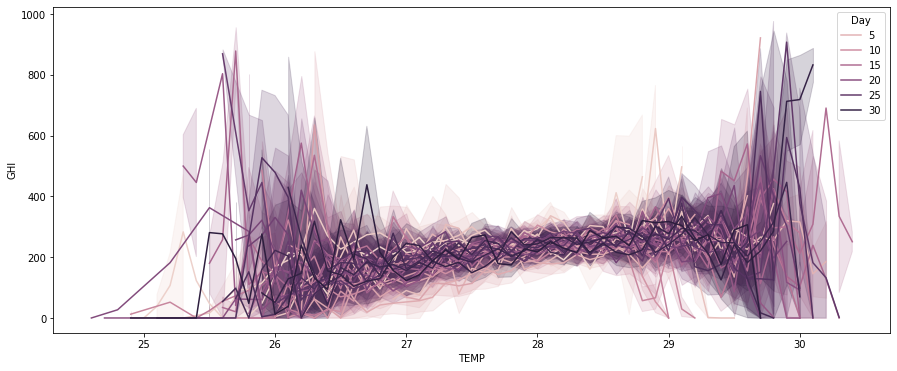

In [359]:
fig = plt.figure(figsize=(15,6)) 
sns.lineplot(data = Rad_df, x = 'TEMP', y = 'GHI', hue = 'Day')

<AxesSubplot:xlabel='TEMP', ylabel='GHI'>

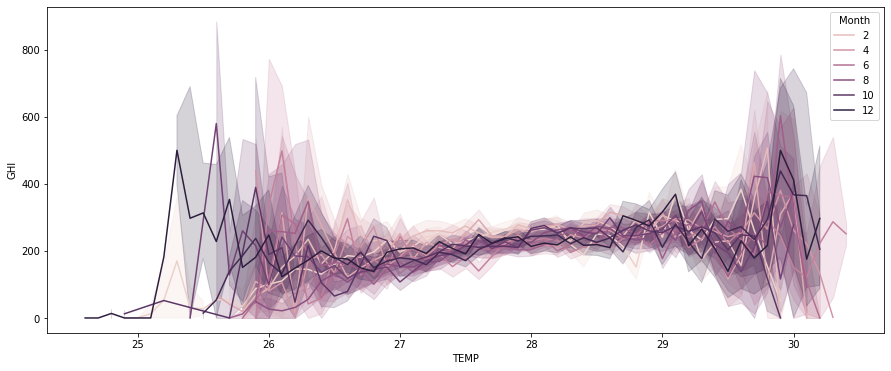

In [360]:
fig = plt.figure(figsize=(15,6)) 
sns.lineplot(data = Rad_df, x = 'TEMP', y = 'GHI', hue = 'Month')

<AxesSubplot:xlabel='TEMP', ylabel='GHI'>

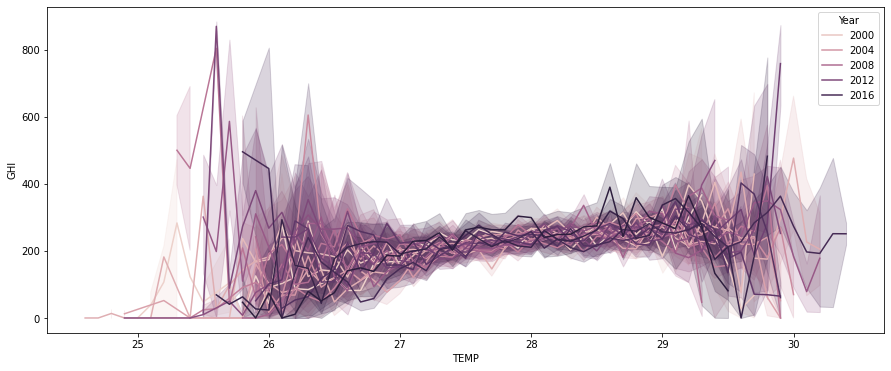

In [361]:
fig = plt.figure(figsize=(15,6)) 
sns.lineplot(data = Rad_df, x = 'TEMP', y = 'GHI', hue = 'Year')

<AxesSubplot:xlabel='TEMP', ylabel='GHI'>

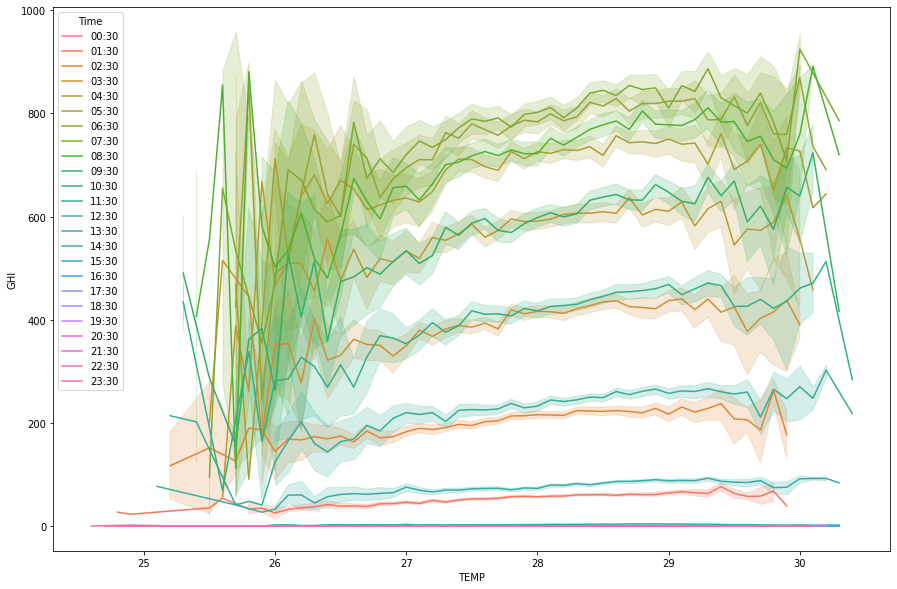

In [362]:
fig = plt.figure(figsize=(15,10)) 
sns.lineplot(data = Rad_df, x = 'TEMP', y = 'GHI', hue = 'Time')

<AxesSubplot:xlabel='TEMP', ylabel='GHI'>

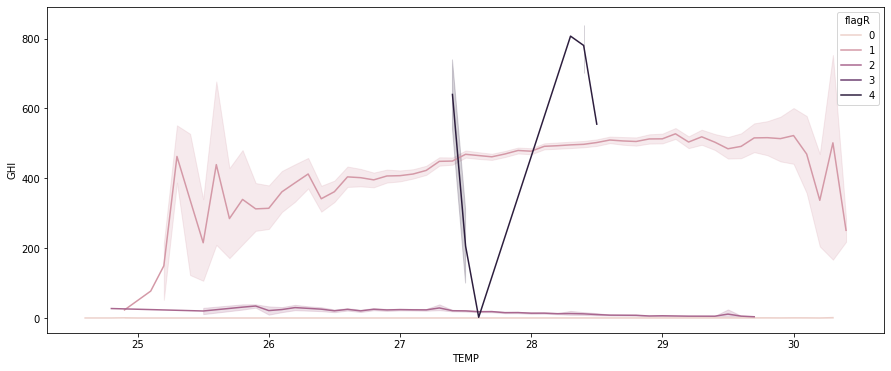

In [363]:
fig = plt.figure(figsize=(15,6))
sns.lineplot(data = Rad_df, x = 'TEMP', y = 'GHI', hue = 'flagR')

<AxesSubplot:xlabel='AP', ylabel='TEMP'>

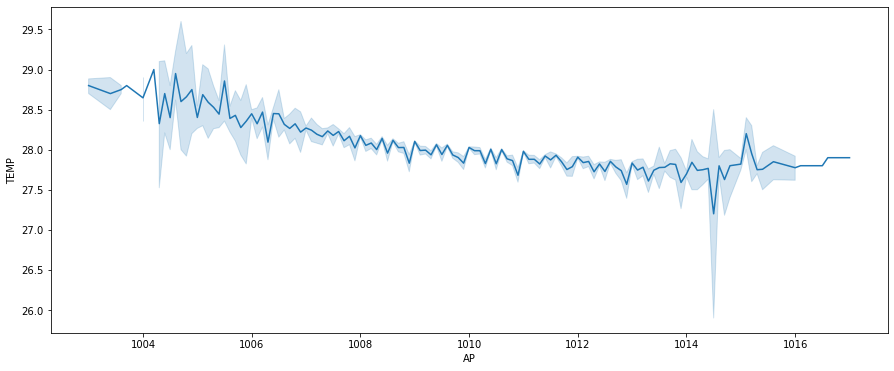

In [371]:
fig = plt.figure(figsize=(15,6)) 
sns.lineplot(data = Rad_df, x = 'AP', y = 'TEMP')

<AxesSubplot:xlabel='WS', ylabel='TEMP'>

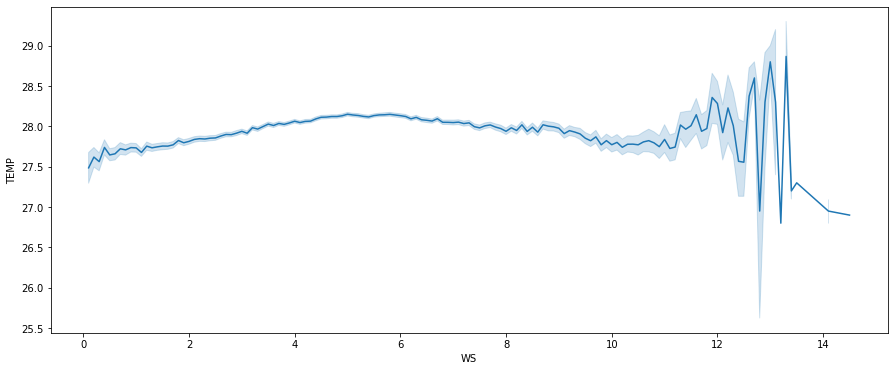

In [377]:
fig = plt.figure(figsize=(15,6)) 
sns.lineplot(data = Rad_df, x = 'WS', y = 'TEMP')

<AxesSubplot:xlabel='RH', ylabel='TEMP'>

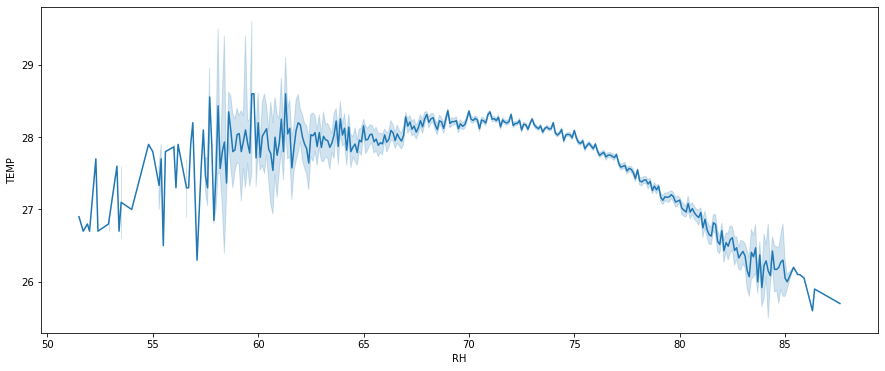

In [376]:
fig = plt.figure(figsize=(15,6)) 
sns.lineplot(data = Rad_df, x = 'RH', y = 'TEMP')